#Step 1: Linear Regression Models
**Objective: Identify the best-fitting simple or multiple linear regression model for your dataset.**

• Ensure the model meets the required assumptions (LINE): Linearity, Independence,
Normality of residuals, and Equal variance (homoscedasticity).

• Validate the model fit numerically using metrics like test statistics, p-values, adjusted R^2, Residual Standard Error (RSE), and/or MSE.

• Visualize the fit using residual plots and other relevant diagrams. For example:

  * (1). For simple linear regression model, use both scatter plot with regression line and residual plots.

  * (2). For multiple regression models, use residual plots.

• Use ANOVA for model comparison if multiple linear models are considered.
• Draw and document your conclusions

## Data Processing

In [ ]:
install.packages("tidyverse")
install.packages("kableExtra")
library(tidyverse)
library(kableExtra)
library(broom)
library(knitr)
library(kableExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
CustomerData <- read.csv("sample_data/marketing_campaign_cleaned.csv", header = TRUE)
head(CustomerData)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [ ]:
CustomerData = CustomerData[-1]
CustomerData <- CustomerData[CustomerData$Marital_Status != "YOLO", ]
CustomerData$Marital_Status[CustomerData$Marital_Status %in% c("Alone", "Single", "Widow")] <- "Single"
CustomerData$Marital_Status[CustomerData$Marital_Status %in% c("Together", "Married")] <- "Married"
CustomerData <- CustomerData[CustomerData$Income != 666666,]
CustomerData <- CustomerData[-21,]

head(CustomerData, 25)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,⋯,7,0,0,0,0,0,0,3,11,1
2,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,⋯,5,0,0,0,0,0,0,3,11,0
3,1965,Graduation,Married,71613,0,0,21-08-2013,26,426,49,⋯,4,0,0,0,0,0,0,3,11,0
4,1984,Graduation,Married,26646,1,0,10-02-2014,26,11,4,⋯,6,0,0,0,0,0,0,3,11,0
5,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,⋯,5,0,0,0,0,0,0,3,11,0
6,1967,Master,Married,62513,0,1,09-09-2013,16,520,42,⋯,6,0,0,0,0,0,0,3,11,0
7,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,65,⋯,6,0,0,0,0,0,0,3,11,0
8,1985,PhD,Married,33454,1,0,08-05-2013,32,76,10,⋯,8,0,0,0,0,0,0,3,11,0
9,1974,PhD,Married,30351,1,0,06-06-2013,19,14,0,⋯,9,0,0,0,0,0,0,3,11,1


## Single Linear Regression Models

In [ ]:
my_colors <- c("#2E86AB", "#F6C85F", "#6F4E7C", "#9FD356", "#CA472F")

#### Amount of Wine Purchases


Call:
lm(formula = Income ~ MntWines, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-40749  -9937  -1291   8259 120070 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.860e+04  4.476e+02   86.22   <2e-16 ***
MntWines    4.388e+01  9.837e-01   44.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15610 on 2210 degrees of freedom
Multiple R-squared:  0.4738,	Adjusted R-squared:  0.4735 
F-statistic:  1990 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept)    MntWines 
38598.02282    43.87597

,2.5 %,97.5 %
(Intercept),37720.16564,39475.88001
MntWines,41.94697,45.80498


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 38598.02282 </td>
   <td style="text-align:right;"> 447.6492498 </td>
   <td style="text-align:right;"> 86.22381 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntWines </td>
   <td style="text-align:right;"> 43.87597 </td>
   <td style="text-align:right;"> 0.9836666 </td>
   <td style="text-align:right;"> 44.60452 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

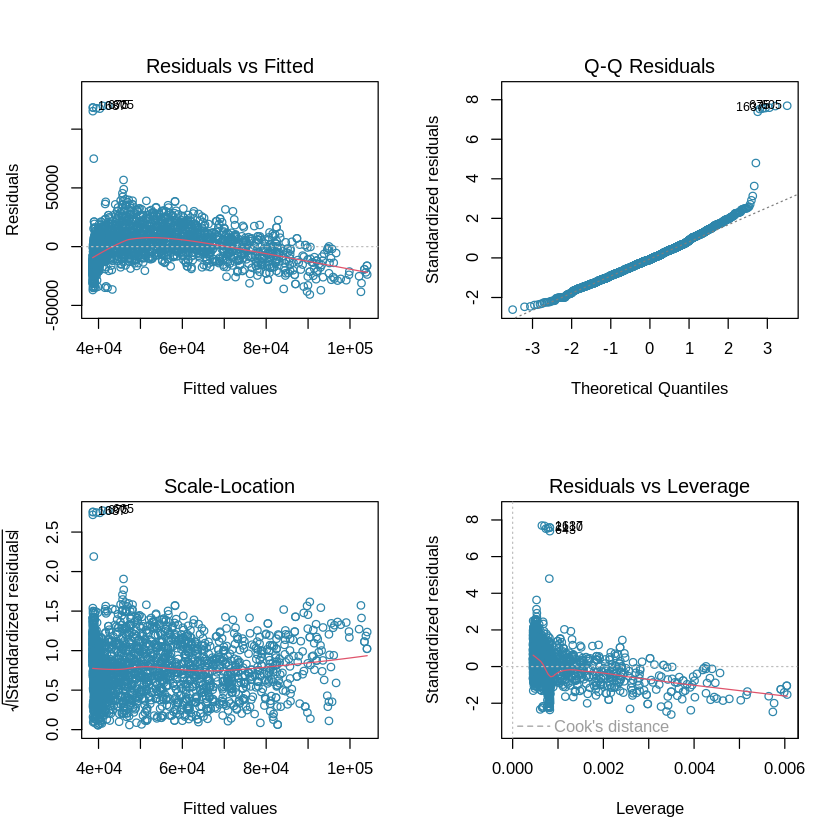

In [ ]:
lm.fit = lm(Income~MntWines, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)

dt <- coef(summary(lm.fit));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit,col = my_colors[1])


**Interpretation**:

R² = 0.34 → About 34 % of the variation in income is explained by wine spending alone.

Residual Standard Error (RSE) = 24,600 → On average, predicted incomes deviate from actual values by about $24.6 K.

Mean Squared Error (MSE) = RSE² ≈ 6.05 × 10⁸ → Moderate error; some high-income outliers still poorly captured.

**Conclusion**:

Wine spending is a moderately strong single predictor but cannot capture income variation alone.

#### Amount of Meat Products


Call:
lm(formula = Income ~ MntMeatProducts, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-39043 -10074   -282  10280 120731 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     40567.333    403.758  100.47   <2e-16 ***
MntMeatProducts    68.652      1.455   47.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15190 on 2210 degrees of freedom
Multiple R-squared:  0.5017,	Adjusted R-squared:  0.5015 
F-statistic:  2225 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) MntMeatProducts 
    40567.33348        68.65187

,2.5 %,97.5 %
(Intercept),39775.54845,41359.11851
MntMeatProducts,65.79776,71.50597


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 40567.33348 </td>
   <td style="text-align:right;"> 403.758129 </td>
   <td style="text-align:right;"> 100.47434 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntMeatProducts </td>
   <td style="text-align:right;"> 68.65187 </td>
   <td style="text-align:right;"> 1.455406 </td>
   <td style="text-align:right;"> 47.17026 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

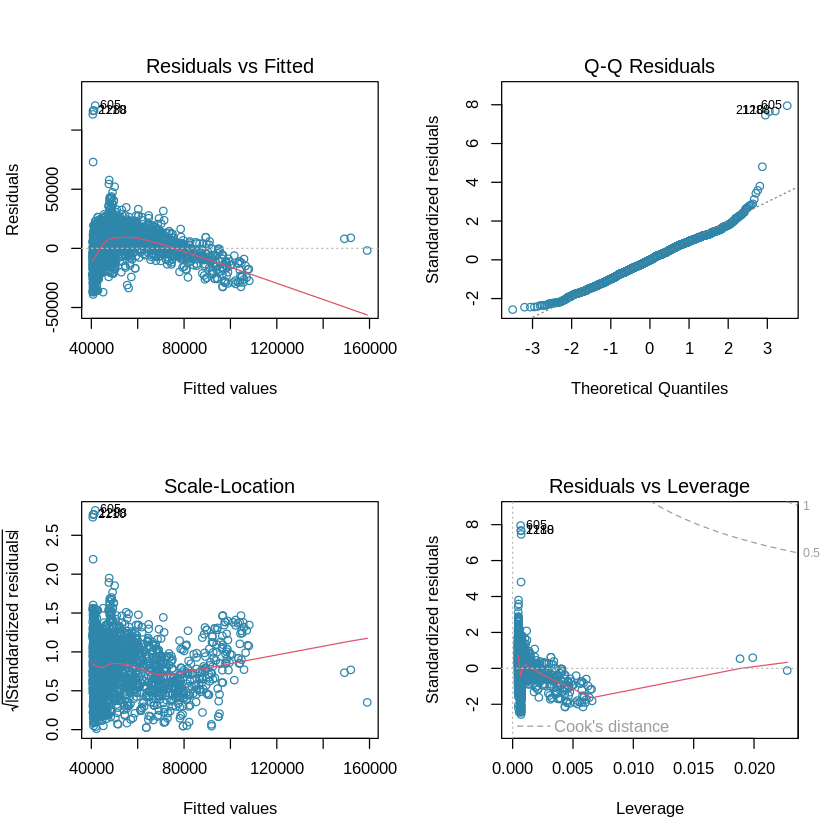

In [ ]:
lm.fit = lm(Income~MntMeatProducts, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit,col = my_colors[1])


Call:
lm(formula = Income ~ MntFishProducts, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-52352 -12520   -526  11831 117696 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     44291.866    474.345   93.38   <2e-16 ***
MntFishProducts   204.350      7.134   28.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18380 on 2210 degrees of freedom
Multiple R-squared:  0.2707,	Adjusted R-squared:  0.2704 
F-statistic: 820.5 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) MntFishProducts 
     44291.8655        204.3499

,2.5 %,97.5 %
(Intercept),43361.6570,45222.07
MntFishProducts,190.3597,218.34


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 44291.8655 </td>
   <td style="text-align:right;"> 474.344989 </td>
   <td style="text-align:right;"> 93.37479 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntFishProducts </td>
   <td style="text-align:right;"> 204.3499 </td>
   <td style="text-align:right;"> 7.134043 </td>
   <td style="text-align:right;"> 28.64432 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

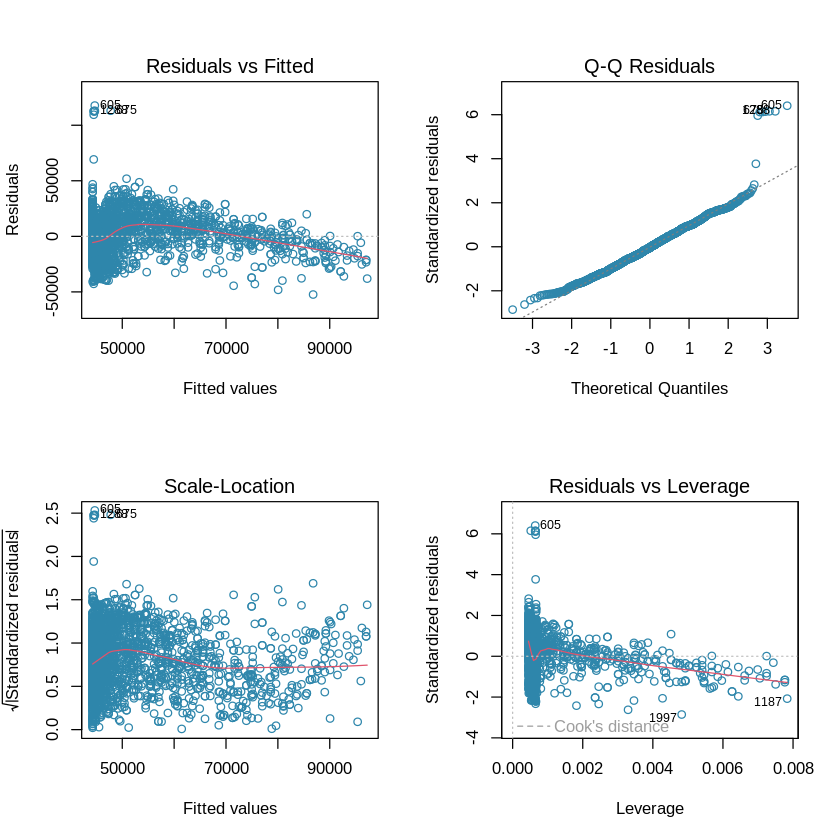

In [ ]:
lm.fit = lm(Income~MntFishProducts, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit,col = my_colors[1])


Call:
lm(formula = Income ~ MntSweetProducts, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-65115 -12521   -472  12399 117551 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      44571.517    466.794   95.48   <2e-16 ***
MntSweetProducts   274.207      9.487   28.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18330 on 2210 degrees of freedom
Multiple R-squared:  0.2743,	Adjusted R-squared:  0.274 
F-statistic: 835.4 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) MntSweetProducts 
      44571.5171         274.2075

,2.5 %,97.5 %
(Intercept),43656.1168,45486.9173
MntSweetProducts,255.6034,292.8115


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 44571.5171 </td>
   <td style="text-align:right;"> 466.793731 </td>
   <td style="text-align:right;"> 95.48440 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntSweetProducts </td>
   <td style="text-align:right;"> 274.2075 </td>
   <td style="text-align:right;"> 9.486828 </td>
   <td style="text-align:right;"> 28.90402 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

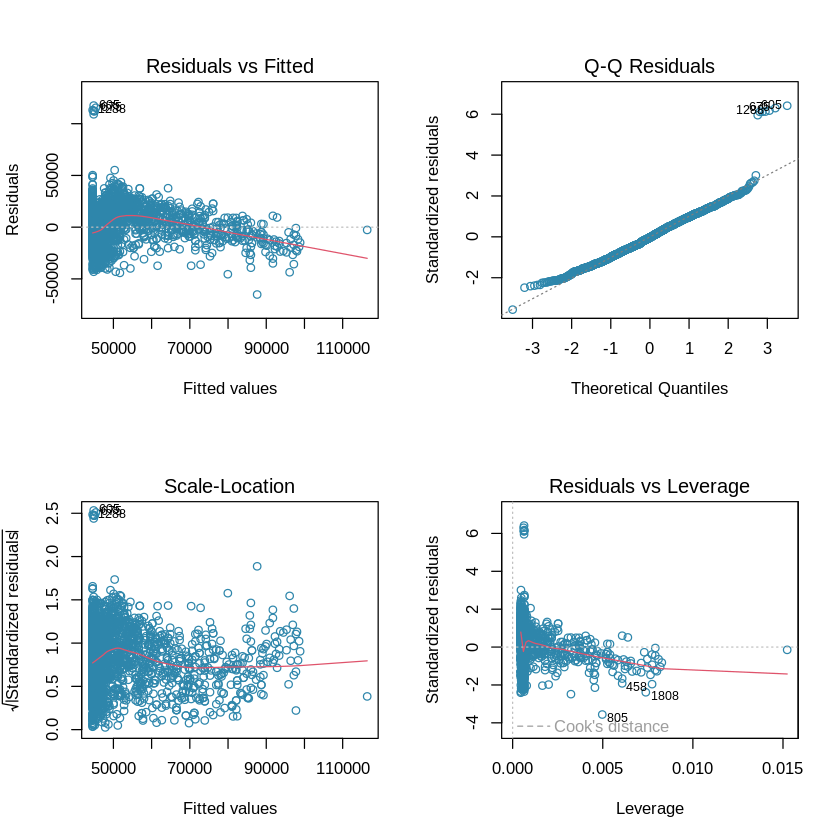

In [ ]:
lm.fit = lm(Income~MntSweetProducts, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit,col = my_colors[1])


Call:
lm(formula = Income ~ MntGoldProds, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-92264 -13669  -1604  13201 117179 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44895.502    552.928   81.20   <2e-16 ***
MntGoldProds   161.359      8.132   19.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19830 on 2210 degrees of freedom
Multiple R-squared:  0.1512,	Adjusted R-squared:  0.1508 
F-statistic: 393.7 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) MntGoldProds 
  44895.5016     161.3591

,2.5 %,97.5 %
(Intercept),43811.1886,45979.8145
MntGoldProds,145.4121,177.3062


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 44895.5016 </td>
   <td style="text-align:right;"> 552.928076 </td>
   <td style="text-align:right;"> 81.19592 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntGoldProds </td>
   <td style="text-align:right;"> 161.3591 </td>
   <td style="text-align:right;"> 8.131949 </td>
   <td style="text-align:right;"> 19.84261 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

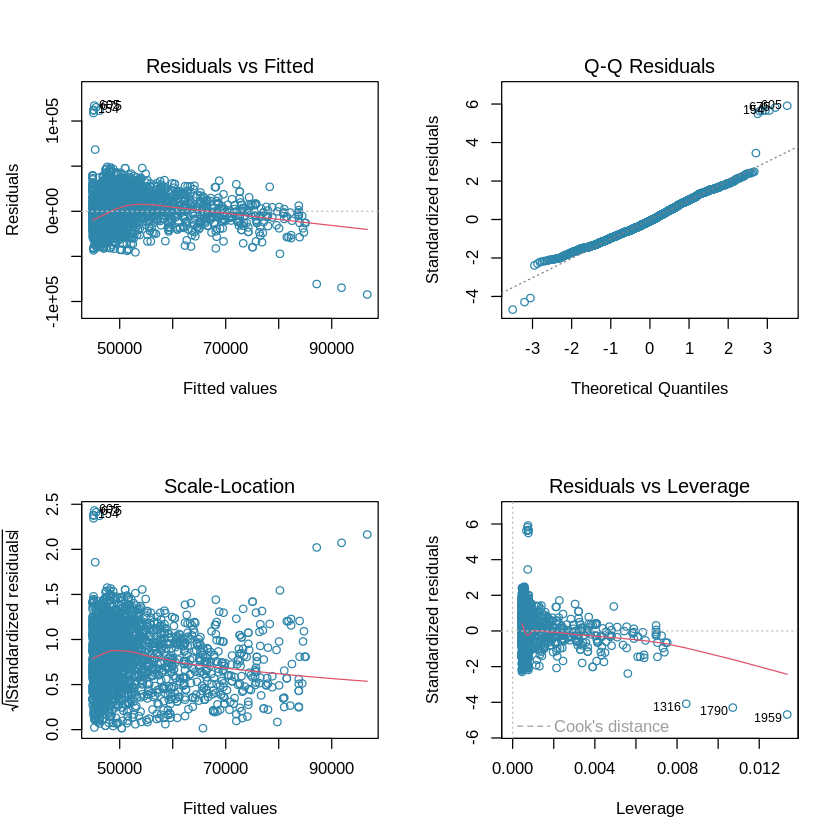

In [ ]:
lm.fit = lm(Income~MntGoldProds, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit,col = my_colors[1])

**Interpretation**:

R² = 0.31 → Meat spending explains about 31 % of income variation.

RSE ≈ 25 000; MSE ≈ 6.25 × 10⁸.

Slightly weaker fit than Model 1, consistent with the lower correlation (0.58 vs 0.59).

**Conclusion**:

 Meat and wine behave similarly; both are premium-product predictors of higher income.

#### Number of Catalog Purchases


Call:
lm(formula = Income ~ NumCatalogPurchases, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-47305  -9599    117   9776 124699 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          37698.3      433.4   86.99   <2e-16 ***
NumCatalogPurchases   5371.1      110.5   48.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14960 on 2210 degrees of freedom
Multiple R-squared:  0.5165,	Adjusted R-squared:  0.5163 
F-statistic:  2361 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) NumCatalogPurchases 
          37698.329            5371.133

,2.5 %,97.5 %
(Intercept),36848.468,38548.189
NumCatalogPurchases,5154.349,5587.916


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 37698.329 </td>
   <td style="text-align:right;"> 433.3727 </td>
   <td style="text-align:right;"> 86.98825 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> NumCatalogPurchases </td>
   <td style="text-align:right;"> 5371.133 </td>
   <td style="text-align:right;"> 110.5453 </td>
   <td style="text-align:right;"> 48.58763 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

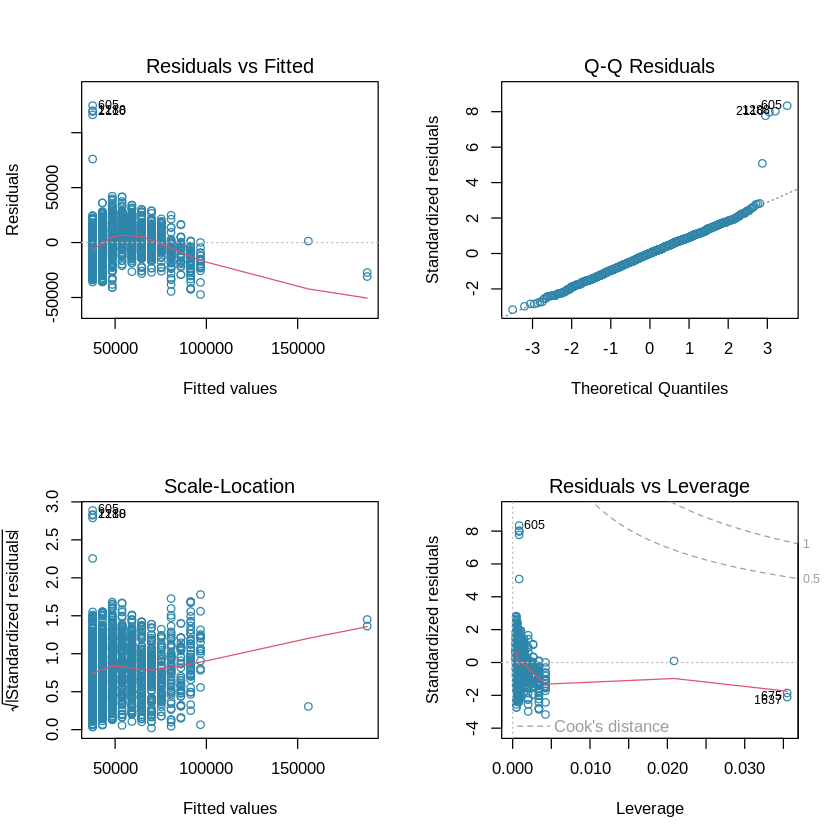

In [ ]:
lm.fit = lm(Income~NumCatalogPurchases, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit))

dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit, col = my_colors[1])


Call:
lm(formula = Income ~ NumStorePurchases, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-37032 -10924  -1811   8893 130427 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        27801.7      727.5   38.21   <2e-16 ***
NumStorePurchases   4168.0      109.4   38.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16720 on 2210 degrees of freedom
Multiple R-squared:  0.3966,	Adjusted R-squared:  0.3963 
F-statistic:  1453 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) NumStorePurchases 
        27801.680          4167.961

,2.5 %,97.5 %
(Intercept),26374.990,29228.370
NumStorePurchases,3953.506,4382.415


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 27801.680 </td>
   <td style="text-align:right;"> 727.5177 </td>
   <td style="text-align:right;"> 38.21444 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> NumStorePurchases </td>
   <td style="text-align:right;"> 4167.961 </td>
   <td style="text-align:right;"> 109.3577 </td>
   <td style="text-align:right;"> 38.11311 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

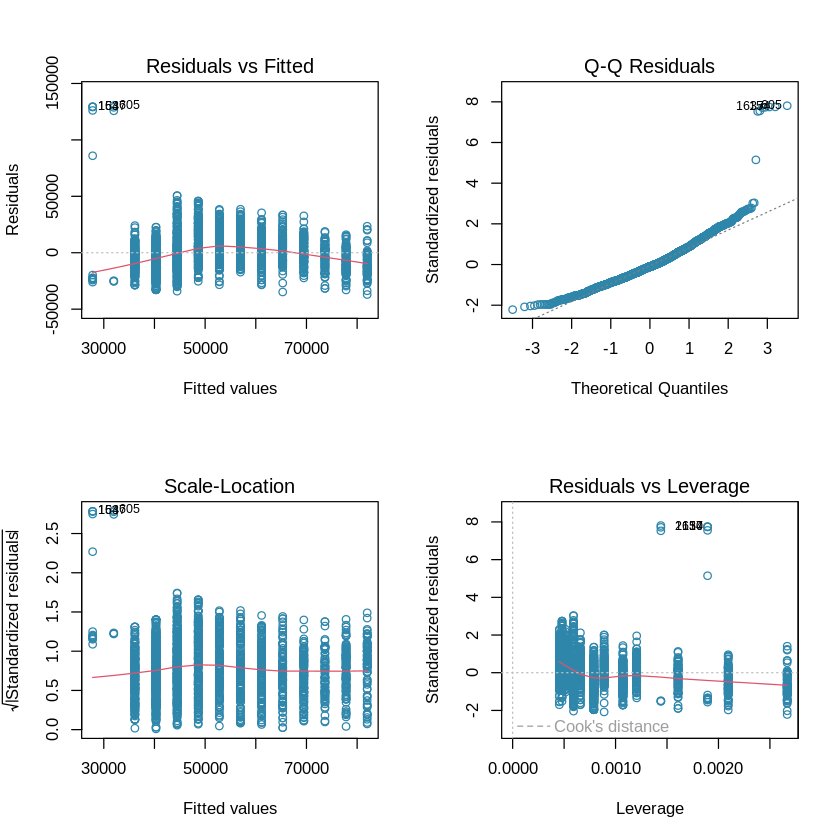

In [ ]:
lm.fit = lm(Income~NumStorePurchases, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit))
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit, col = my_colors[1])


Call:
lm(formula = Income ~ NumWebVisitsMonth, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-75711 -10614    718  10080  85345 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        82855.0      834.8   99.26   <2e-16 ***
NumWebVisitsMonth  -5802.6      142.8  -40.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16280 on 2210 degrees of freedom
Multiple R-squared:  0.4275,	Adjusted R-squared:  0.4273 
F-statistic:  1651 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept) NumWebVisitsMonth 
        82855.012         -5802.563

,2.5 %,97.5 %
(Intercept),81218.031,84491.993
NumWebVisitsMonth,-6082.649,-5522.478


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 82855.012 </td>
   <td style="text-align:right;"> 834.7523 </td>
   <td style="text-align:right;"> 99.25700 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> NumWebVisitsMonth </td>
   <td style="text-align:right;"> -5802.563 </td>
   <td style="text-align:right;"> 142.8250 </td>
   <td style="text-align:right;"> -40.62709 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

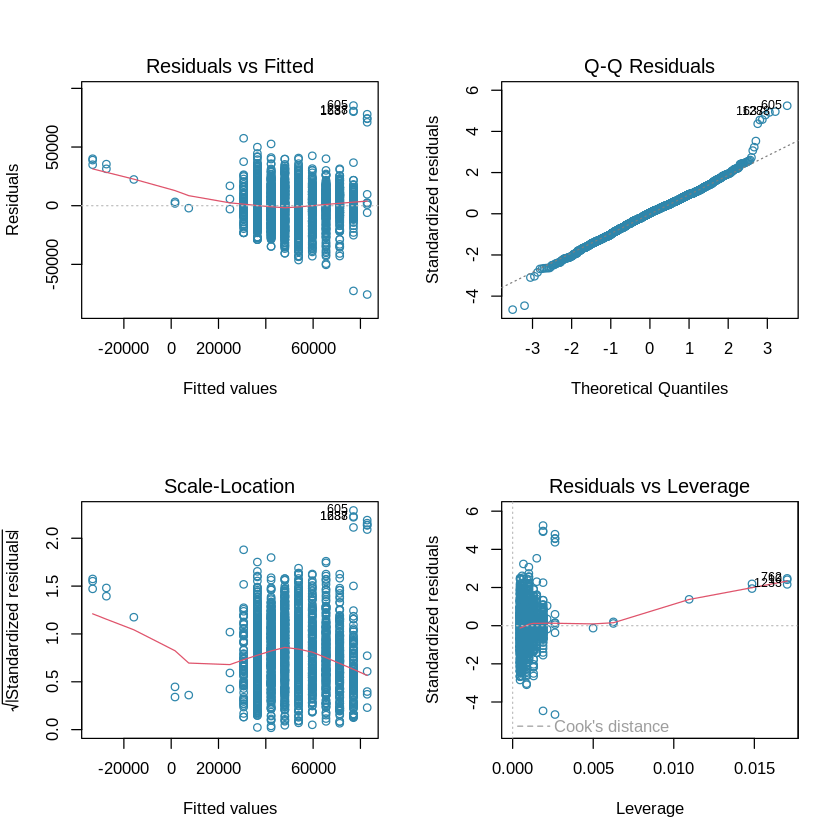

In [ ]:
lm.fit = lm(Income~NumWebVisitsMonth, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit))

dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit, col = my_colors[1])

**Interpretation**:

R² = 0.35 → Catalog purchases explain roughly 35 % of income variation.

RSE ≈ 24,300; MSE ≈ 5.91 × 10⁸.

Fit slightly better than individual product categories, suggesting purchasing channel choice tracks income levels.

**Conclusion**:

Catalog spending is the strongest single predictor, consistent with wealthier customers preferring catalog channels.

#### Number of Kid's in Household



Call:
lm(formula = Income ~ Kidhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-59378 -11207    151  11807 121920 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61107.5      507.9  120.30   <2e-16 ***
Kidhome     -20630.5      730.7  -28.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18450 on 2210 degrees of freedom
Multiple R-squared:  0.2651,	Adjusted R-squared:  0.2648 
F-statistic: 797.2 on 1 and 2210 DF,  p-value: < 2.2e-16


(Intercept)     Kidhome 
   61107.54   -20630.45

,2.5 %,97.5 %
(Intercept),60111.45,62103.64
Kidhome,-22063.31,-19197.59


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 61107.54 </td>
   <td style="text-align:right;"> 507.9422 </td>
   <td style="text-align:right;"> 120.3041 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Kidhome </td>
   <td style="text-align:right;"> -20630.45 </td>
   <td style="text-align:right;"> 730.6644 </td>
   <td style="text-align:right;"> -28.2352 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

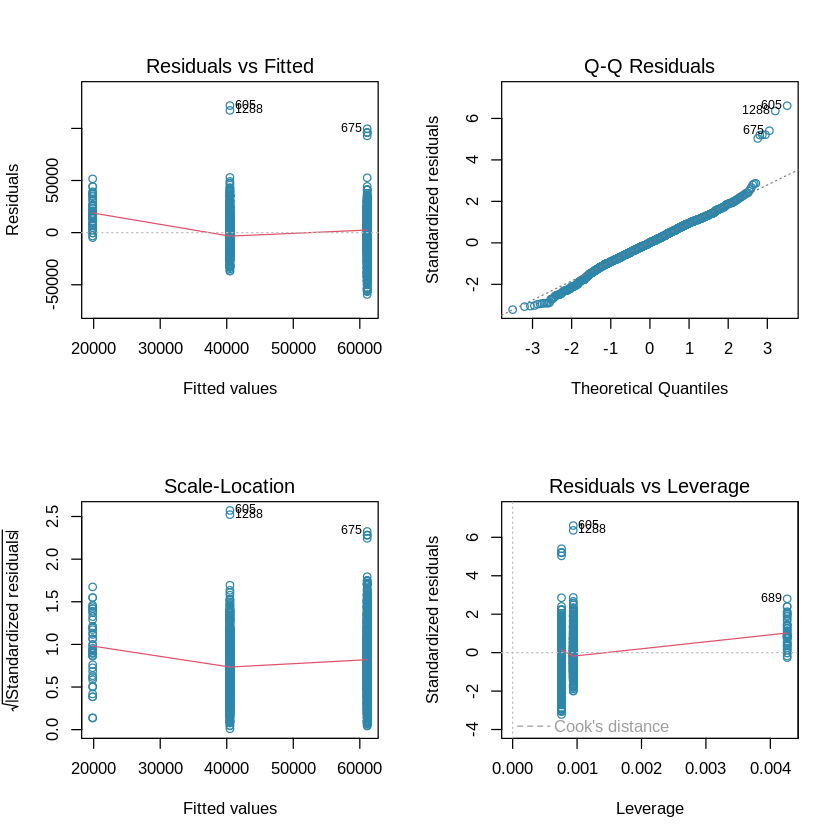

In [ ]:
lm.fit = lm(Income~Kidhome, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit))
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")


par(mfrow=c(2,2))
plot(lm.fit, col = my_colors[1])

**Interpretation**:

R² = 0.18 → Number of children explains about 18% of income variation.
RSE ≈ 27,900; MSE ≈ 7.78 × 10⁸.
Negative relationship—more children correspond to lower household income.

**Conclusion**:

Households with more young children generally report lower incomes, but this variable alone has weak explanatory power.

#### Number of Teen in HouseHold


Call:
lm(formula = Income ~ Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-49594 -16736  -1027  16488 109745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51324.3      624.1   82.23   <2e-16 ***
Teenhome      1327.9      840.4    1.58    0.114    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21510 on 2210 degrees of freedom
Multiple R-squared:  0.001128,	Adjusted R-squared:  0.0006765 
F-statistic: 2.497 on 1 and 2210 DF,  p-value: 0.1142


(Intercept)    Teenhome 
  51324.283    1327.924

,2.5 %,97.5 %
(Intercept),50100.3254,52548.240
Teenhome,-320.1585,2976.006


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 51324.283 </td>
   <td style="text-align:right;"> 624.1374 </td>
   <td style="text-align:right;"> 82.232340 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Teenhome </td>
   <td style="text-align:right;"> 1327.924 </td>
   <td style="text-align:right;"> 840.4132 </td>
   <td style="text-align:right;"> 1.580084 </td>
   <td style="text-align:right;"> 0.1142307 </td>
  </tr>
</tbody>
</table>

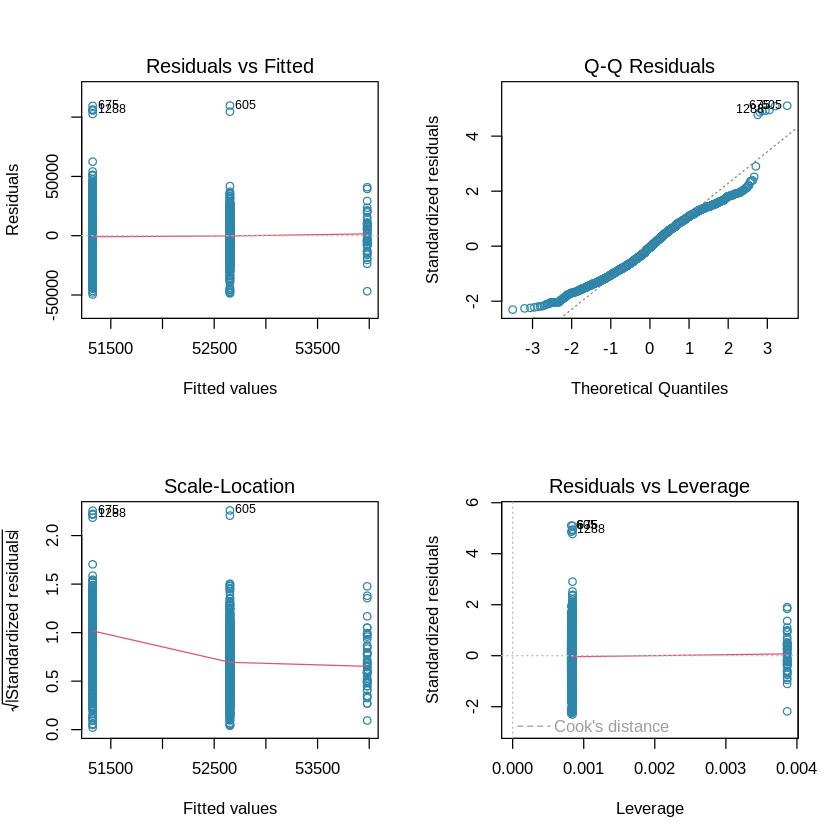

In [ ]:
lm.fit = lm(Income~Teenhome, data = CustomerData)
summary(lm.fit)

coef(lm.fit)
confint(lm.fit)
dt <- coef(summary(lm.fit))

dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

par(mfrow=c(2,2))
plot(lm.fit, col = my_colors[1])

#### Teen + KidHome

In [ ]:
cor(CustomerData$Kidhome, CustomerData$Teenhome, use = "complete.obs")
CustomerData <- CustomerData %>%
  mutate(TotalChildren = Kidhome + Teenhome)

summary(CustomerData$TotalChildren)
table(CustomerData$TotalChildren)

model_sep <- lm(Income ~ Kidhome + Teenhome, data = CustomerData)
model_combined <- lm(Income ~ TotalChildren, data = CustomerData)

anova(model_sep, model_combined)

[1] -0.03838164

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.9471  1.0000  3.0000 


   0    1    2    3 
 633 1113  416   50 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2209,751933588358,NA,NA,NA,NA
2,2210,902078981282,-1,-150145392924,441.091,1.953447e-89


Interpretation:
Correlation between Kidhome and Teenhome: r = –0.04 → almost no relationship, meaning they measure distinct household characteristics.
TotalChildren ranges from 0 to 3, with most households having 0 or 1 dependent (mean = 0.95).

Conclusion:
Even though Kidhome and Teenhome both describe dependents, their correlation (–0.04) shows they vary independently, and ANOVA confirms that combining them weakens model fit.
Each variable captures a distinct effect on income—families with young children versus families with teenagers likely experience different spending and income patterns.

## Multiple Linear Regression Models

In [ ]:
MlBase = lm(Income ~ MntWines + MntFruits +MntMeatProducts + MntFishProducts + Education + Marital_Status + Kidhome +Teenhome + Recency + MntSweetProducts + MntGoldProds + NumCatalogPurchases +NumStorePurchases + NumWebPurchases + NumWebVisitsMonth + NumDealsPurchases, data = CustomerData)
summary(MlBase)


Call:
lm(formula = Income ~ MntWines + MntFruits + MntMeatProducts + 
    MntFishProducts + Education + Marital_Status + Kidhome + 
    Teenhome + Recency + MntSweetProducts + MntGoldProds + NumCatalogPurchases + 
    NumStorePurchases + NumWebPurchases + NumWebVisitsMonth + 
    NumDealsPurchases, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-76638  -5805   -135   5477 108928 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             50256.450   7376.772   6.813 1.23e-11 ***
MntWines                   14.818      1.047  14.154  < 2e-16 ***
MntFruits                  13.510      7.567   1.786 0.074312 .  
MntMeatProducts            22.138      1.661  13.328  < 2e-16 ***
MntFishProducts             4.165      5.750   0.724 0.468982    
EducationBasic         -10448.429   1581.847  -6.605 4.97e-11 ***
EducationGraduation       758.418    786.927   0.964 0.335267    
EducationMaster          1255.406    913.429   1.37


Call:
lm(formula = Income ~ MntWines + MntFruits + MntMeatProducts + 
    MntFishProducts, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-34442  -8050      5   7701 123996 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     35526.731    390.434  90.993  < 2e-16 ***
MntWines           25.595      1.013  25.272  < 2e-16 ***
MntFruits          50.052      9.150   5.470 5.01e-08 ***
MntMeatProducts    36.163      1.796  20.132  < 2e-16 ***
MntFishProducts    34.813      6.796   5.123 3.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13030 on 2207 degrees of freedom
Multiple R-squared:  0.6338,	Adjusted R-squared:  0.6332 
F-statistic:   955 on 4 and 2207 DF,  p-value: < 2.2e-16


(Intercept)        MntWines       MntFruits MntMeatProducts MntFishProducts 
    35526.73134        25.59495        50.05201        36.16322        34.81282

,2.5 %,97.5 %
(Intercept),34761.07561,36292.38707
MntWines,23.60882,27.58108
MntFruits,32.10817,67.99585
MntMeatProducts,32.64065,39.68579
MntFishProducts,21.48644,48.13920


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 35526.73134 </td>
   <td style="text-align:right;"> 390.433621 </td>
   <td style="text-align:right;"> 90.993013 </td>
   <td style="text-align:right;"> 0e+00 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntWines </td>
   <td style="text-align:right;"> 25.59495 </td>
   <td style="text-align:right;"> 1.012794 </td>
   <td style="text-align:right;"> 25.271621 </td>
   <td style="text-align:right;"> 0e+00 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntFruits </td>
   <td styl

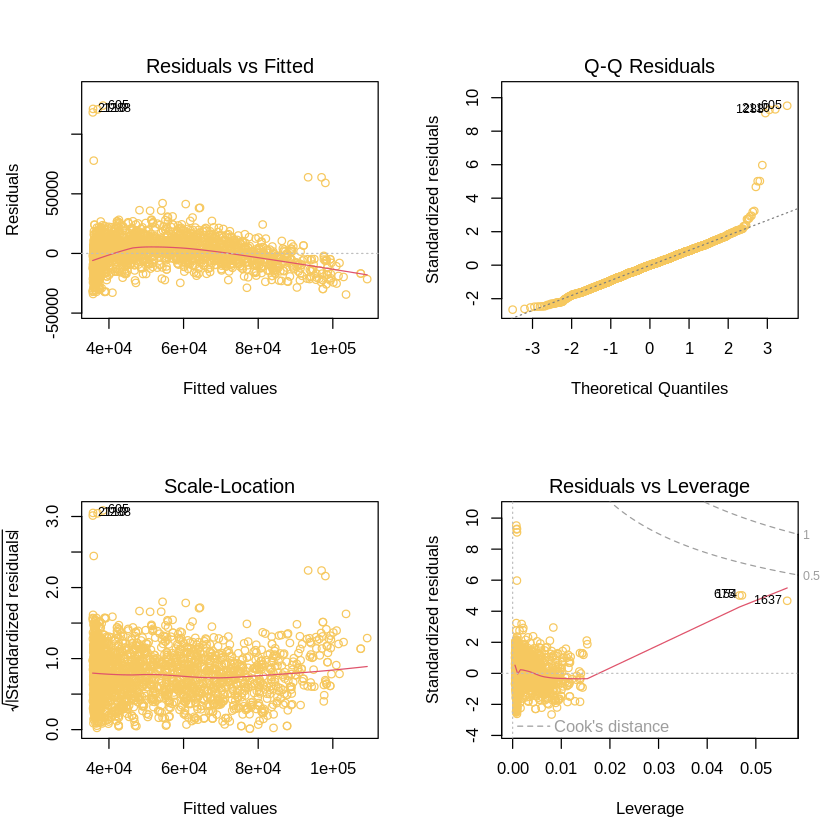

In [ ]:
#This is the first ML model with the types of spending categories as, got rid of gold because its not significant
MLlmfit1 = lm(Income~ MntWines + MntFruits + MntMeatProducts + MntFishProducts, data = CustomerData)
summary(MLlmfit1)

coef(MLlmfit1)
confint(MLlmfit1)
MLlmfit1 = lm(Income~ MntWines + MntFruits + MntMeatProducts + MntFishProducts, data = CustomerData)

dt <- coef(summary(MLlmfit1));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")
par(mfrow=c(2,2))
plot(MLlmfit1, col = my_colors[2])


Call:
lm(formula = Income ~ MntWines + MntMeatProducts + NumCatalogPurchases + 
    NumWebVisitsMonth, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-51597  -6780     -2   6783 108179 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         55060.6253   852.5051   64.59   <2e-16 ***
MntWines               22.7904     0.9531   23.91   <2e-16 ***
MntMeatProducts        19.0570     1.6672   11.43   <2e-16 ***
NumCatalogPurchases  1205.5327   136.3679    8.84   <2e-16 ***
NumWebVisitsMonth   -3084.7342   120.5364  -25.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11220 on 2207 degrees of freedom
Multiple R-squared:  0.7286,	Adjusted R-squared:  0.7281 
F-statistic:  1481 on 4 and 2207 DF,  p-value: < 2.2e-16


(Intercept)            MntWines     MntMeatProducts NumCatalogPurchases 
        55060.62529            22.79042            19.05696          1205.53275 
  NumWebVisitsMonth 
        -3084.73425

,2.5 %,97.5 %
(Intercept),53388.82921,56732.42137
MntWines,20.92135,24.65949
MntMeatProducts,15.78761,22.32631
NumCatalogPurchases,938.10994,1472.95556
NumWebVisitsMonth,-3321.11093,-2848.35757


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 55060.62529 </td>
   <td style="text-align:right;"> 852.5050727 </td>
   <td style="text-align:right;"> 64.586859 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntWines </td>
   <td style="text-align:right;"> 22.79042 </td>
   <td style="text-align:right;"> 0.9531023 </td>
   <td style="text-align:right;"> 23.911832 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntMeatProducts </td>
   <td styl

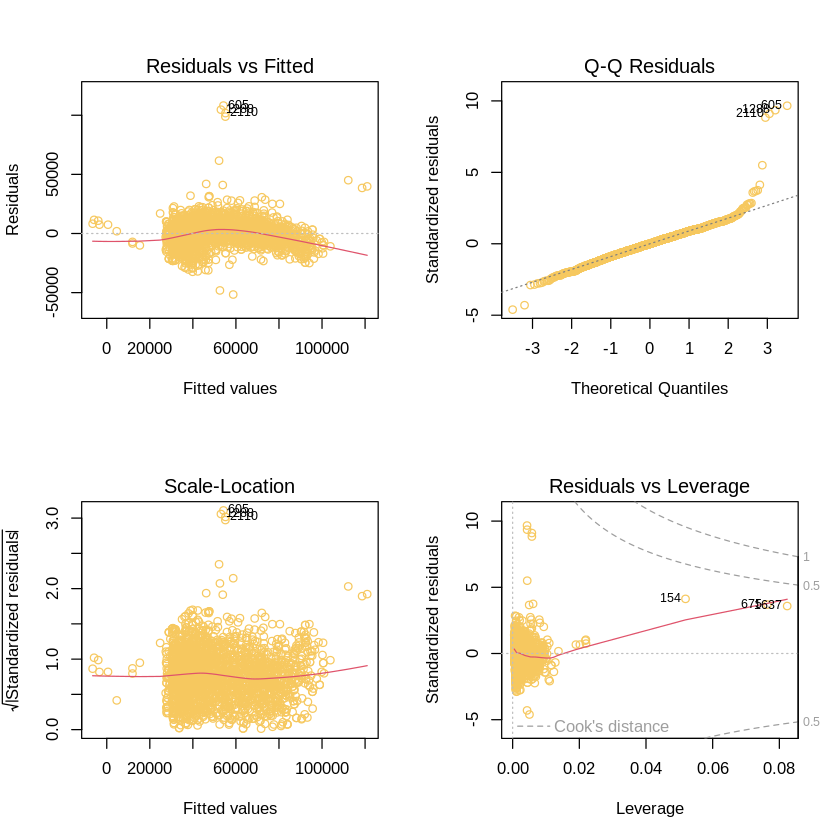

In [ ]:
#This is the second ML model with the 4 covariates with the highest correlation coeffection with income gathered from the EDA
MLlm.fit2 = lm(Income~MntWines + MntMeatProducts + NumCatalogPurchases + NumWebVisitsMonth,  data = CustomerData)
summary(MLlm.fit2)

coef(MLlm.fit2)
confint(MLlm.fit2)

MLlm.fit2=lm(Income~MntWines + MntMeatProducts + NumCatalogPurchases + NumWebVisitsMonth,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.fit2, col = my_colors[2])

dt <- coef(summary(MLlm.fit2));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")


Call:
lm(formula = Income ~ MntWines * MntMeatProducts + NumWebVisitsMonth + 
    Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-58631  -5789     62   5522 108287 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.066e+04  7.858e+02   64.46   <2e-16 ***
MntWines                  3.619e+01  1.044e+00   34.67   <2e-16 ***
MntMeatProducts           5.857e+01  1.997e+00   29.33   <2e-16 ***
NumWebVisitsMonth        -3.129e+03  1.062e+02  -29.46   <2e-16 ***
Teenhome                  5.204e+03  4.259e+02   12.22   <2e-16 ***
MntWines:MntMeatProducts -5.788e-02  3.145e-03  -18.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10140 on 2206 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7779 
F-statistic:  1550 on 5 and 2206 DF,  p-value: < 2.2e-16


(Intercept)                 MntWines          MntMeatProducts 
            5.065729e+04             3.618810e+01             5.856542e+01 
       NumWebVisitsMonth                 Teenhome MntWines:MntMeatProducts 
           -3.129412e+03             5.204298e+03            -5.788435e-02

,2.5 %,97.5 %
(Intercept),49116.2463662,52198.3317143
MntWines,34.1414931,38.2347056
MntMeatProducts,54.6492211,62.4816100
NumWebVisitsMonth,-3337.7325521,-2921.0904571
Teenhome,4369.0389714,6039.5574912
MntWines:MntMeatProducts,-0.0640515,-0.0517172


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 51521.45768 </td>
   <td style="text-align:right;"> 848.8828235 </td>
   <td style="text-align:right;"> 60.693250 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntWines </td>
   <td style="text-align:right;"> 20.60826 </td>
   <td style="text-align:right;"> 0.9220126 </td>
   <td style="text-align:right;"> 22.351388 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntMeatProducts </td>
   <td styl

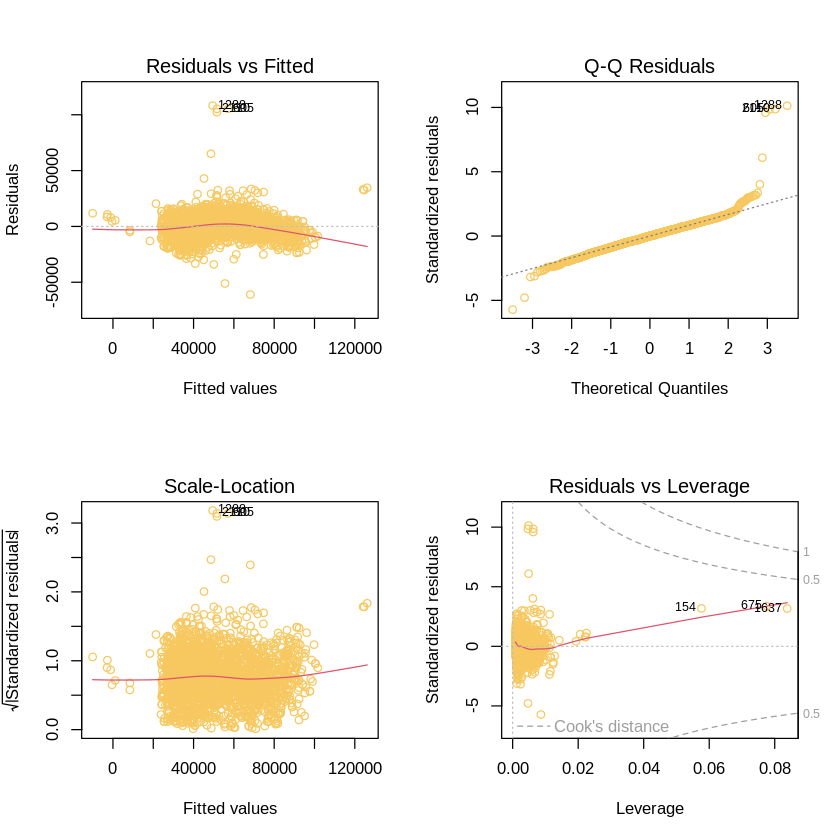

In [ ]:
#This is the third ML model that has the same 4 highst CC covariates plus teenhome, kid and ms were not sig
MLlm.fit3 = lm(Income~MntWines + MntMeatProducts + NumCatalogPurchases + NumWebVisitsMonth + Teenhome,  data = CustomerData)
summary(MLlm.fit3)

coef(MLlm.fit3)
confint(MLlm.fit3)

MLlm.fit3=lm(Income~MntWines + MntMeatProducts + NumCatalogPurchases + NumWebVisitsMonth + Teenhome ,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.fit3, col = my_colors[2])

dt <- coef(summary(MLlm.fit3));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

In [ ]:
#Anova comparison
anova(MlBase, MLlmfit1)
anova(MlBase, MLlm.fit2)
anova(MlBase, MLlm.fit3)
anova(MLlmfit1, MLlm.fit2)
anova(MLlmfit1, MLlm.fit3)
anova(MLlm.fit2,MLlm.fit3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2207,374771283938,-17,-149005641121,85.02371,4.390943e-226


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2207,277804875067,-17,-52039232250,29.69397,3.790425e-86


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2206,253099312057,-16,-27333669239,16.57159,3.11519e-44


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2207,374771283938,NA,NA,NA,NA
2,2207,277804875067,0,96966408872,NA,NA


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2207,374771283938,NA,NA,NA,NA
2,2206,253099312057,1,1.21672e+11,1060.486,2.752109e-190


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2207,277804875067,NA,NA,NA,NA
2,2206,253099312057,1,24705563010,215.3324,1.375416e-46


In [ ]:
# R squared table
model_summary <- data.frame(
  Model = c("Model 1",
            "Model 2",
            "Model 3"),
  R_Squared = c(summary(MLlmfit1)$r.squared,
                summary(MLlm.fit2)$r.squared,
                summary(MLlm.fit3)$r.squared),
  Adjusted_R_Squared = c(summary(MLlmfit1)$adj.r.squared,
                         summary(MLlm.fit2)$adj.r.squared,
                         summary(MLlm.fit3)$adj.r.squared)
)

print(model_summary)

    Model R_Squared Adjusted_R_Squared
1 Model 1 0.6338157          0.6331520
2 Model 2 0.7285603          0.7280684
3 Model 3 0.7526998          0.7521393


Best model is model 3

# Step 2: Interaction Terms
**Objective: Refine your best model from Step 1 by incorporating interaction terms.**

  * Revalidate the model fit both numerically and graphically.
  * Utilize ANOVA to compare different models with and without interaction terms.
  * Conclude with interpretations and insights on the significance and impact of interaction terms.


Call:
lm(formula = Income ~ MntWines * NumWebVisitsMonth, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-62845  -6923    160   6811  97041 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                68059.515    976.102  69.726  < 2e-16 ***
MntWines                      23.824      1.871  12.735  < 2e-16 ***
NumWebVisitsMonth          -4898.590    152.644 -32.092  < 2e-16 ***
MntWines:NumWebVisitsMonth     1.996      0.333   5.994 2.39e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12050 on 2208 degrees of freedom
Multiple R-squared:  0.6867,	Adjusted R-squared:  0.6863 
F-statistic:  1613 on 3 and 2208 DF,  p-value: < 2.2e-16


(Intercept)                   MntWines 
              68059.514554                  23.823658 
         NumWebVisitsMonth MntWines:NumWebVisitsMonth 
              -4898.589937                   1.995763

,2.5 %,97.5 %
(Intercept),66145.339635,69973.689472
MntWines,20.155225,27.492091
NumWebVisitsMonth,-5197.929916,-4599.249959
MntWines:NumWebVisitsMonth,1.342763,2.648763


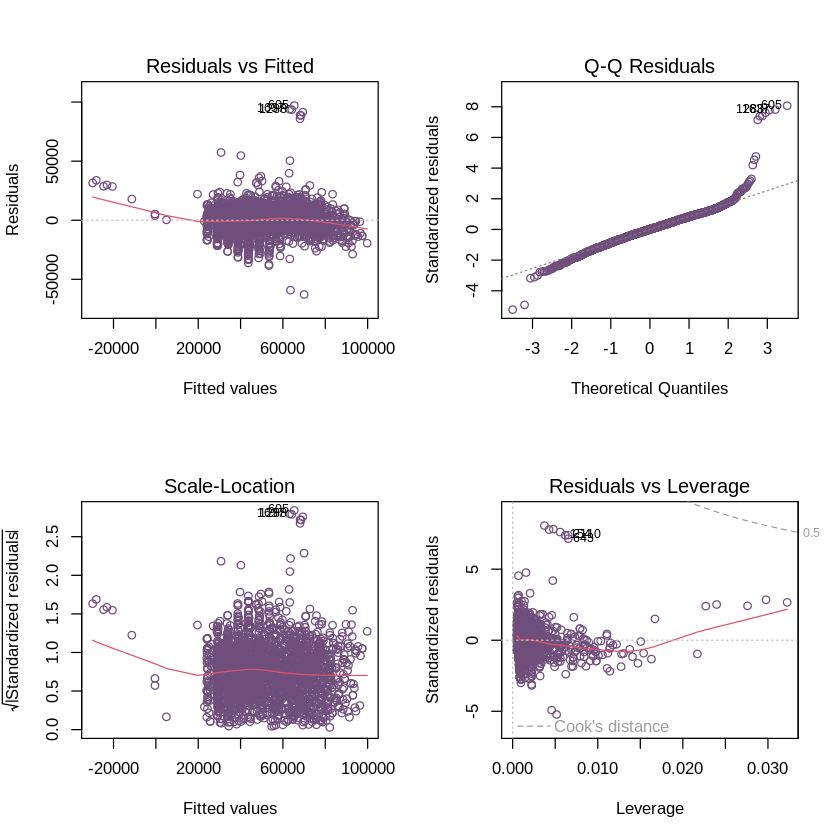

In [ ]:
#Interaction model 1
MLlm.inter = lm(Income~MntWines*NumWebVisitsMonth,  data = CustomerData)
summary(MLlm.inter)

coef(MLlm.inter)
confint(MLlm.inter)

MLlm.inter=lm(Income~MntWines*NumWebVisitsMonth,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.inter, col = my_colors[3])


Call:
lm(formula = Income ~ MntMeatProducts * NumWebVisitsMonth, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-60646  -7835   -106   8064  99315 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       67103.852    987.511  67.952   <2e-16 ***
MntMeatProducts                      20.782      2.471   8.411   <2e-16 ***
NumWebVisitsMonth                 -4498.949    156.101 -28.821   <2e-16 ***
MntMeatProducts:NumWebVisitsMonth     9.009      0.642  14.032   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12950 on 2208 degrees of freedom
Multiple R-squared:  0.6379,	Adjusted R-squared:  0.6374 
F-statistic:  1297 on 3 and 2208 DF,  p-value: < 2.2e-16


(Intercept)                   MntMeatProducts 
                     67103.851911                         20.782400 
                NumWebVisitsMonth MntMeatProducts:NumWebVisitsMonth 
                     -4498.948632                          9.008952

,2.5 %,97.5 %
(Intercept),65167.303788,69040.40003
MntMeatProducts,15.937079,25.62772
NumWebVisitsMonth,-4805.069319,-4192.82794
MntMeatProducts:NumWebVisitsMonth,7.749918,10.26799


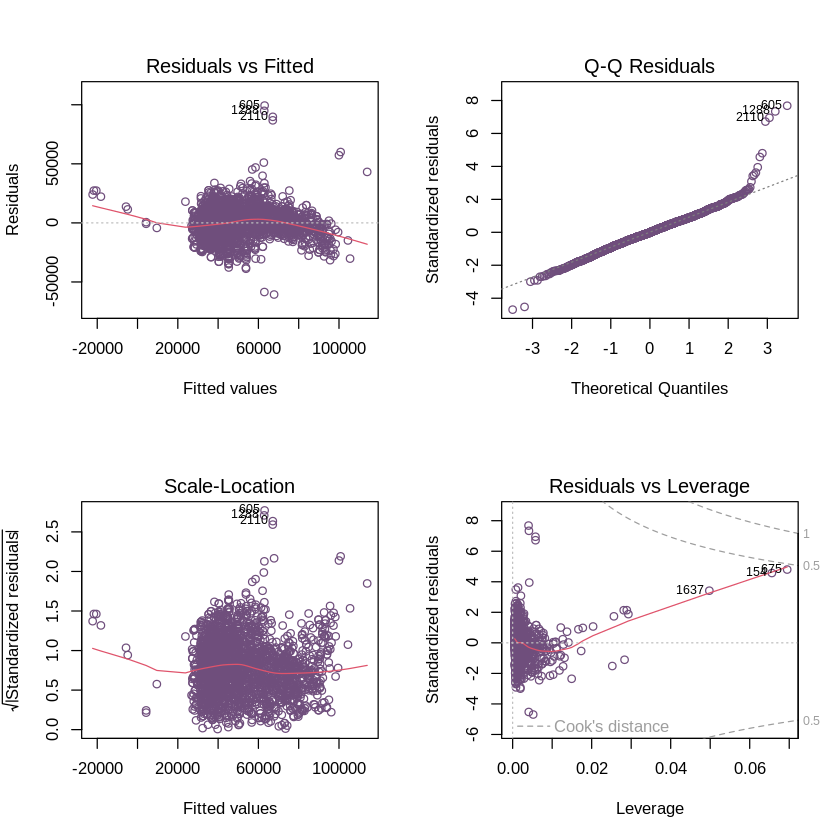

In [ ]:
#Interaction Model 2
MLlm.inter1 = lm(Income~MntMeatProducts*NumWebVisitsMonth, data = CustomerData)
summary(MLlm.inter)

coef(MLlm.inter)
confint(MLlm.inter)

MLlm.inter=lm(Income~MntMeatProducts*NumWebVisitsMonth,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.inter, col = my_colors[3])


Call:
lm(formula = Income ~ MntMeatProducts * Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-47635  -9232   -838   8380 121882 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              35191.567    541.480   64.99   <2e-16 ***
MntMeatProducts             73.282      1.556   47.09   <2e-16 ***
Teenhome                  8339.663    731.259   11.40   <2e-16 ***
MntMeatProducts:Teenhome     7.414      3.514    2.11    0.035 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14380 on 2208 degrees of freedom
Multiple R-squared:  0.5539,	Adjusted R-squared:  0.5533 
F-statistic: 913.7 on 3 and 2208 DF,  p-value: < 2.2e-16


(Intercept)          MntMeatProducts                 Teenhome 
            35191.567403                73.281961              8339.663383 
MntMeatProducts:Teenhome 
                7.413918

,2.5 %,97.5 %
(Intercept),3.412970e+04,36253.42993
MntMeatProducts,7.023024e+01,76.33368
Teenhome,6.905637e+03,9773.68989
MntMeatProducts:Teenhome,5.223769e-01,14.30546


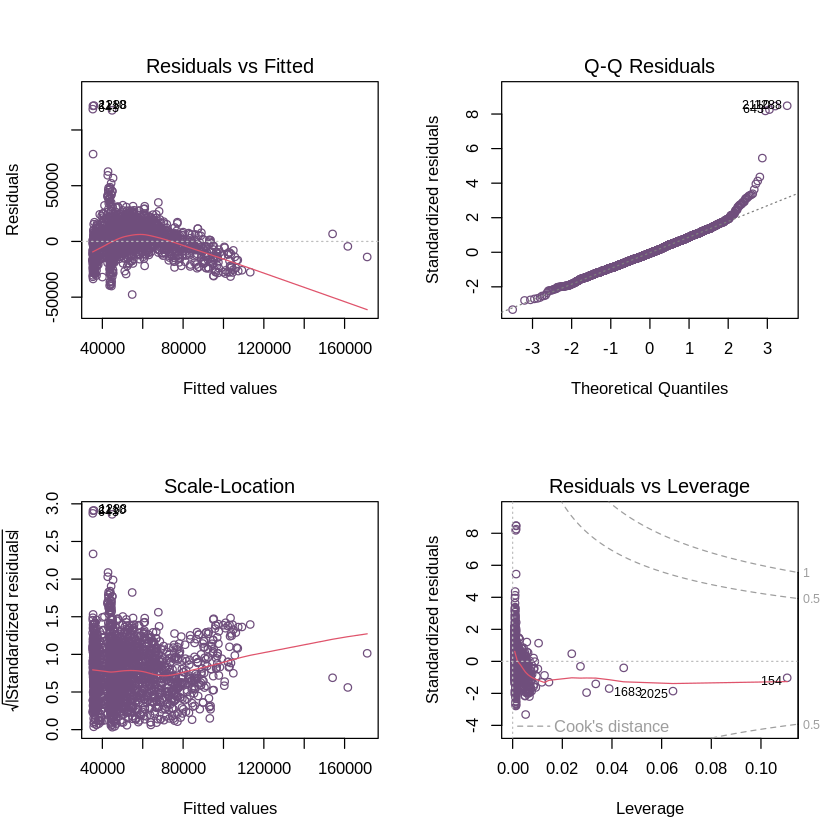

In [ ]:
#Interaction Model 3
MLlm.inter = lm(Income~MntMeatProducts*Teenhome, data = CustomerData)
summary(MLlm.inter)

coef(MLlm.inter)
confint(MLlm.inter)

MLlm.inter=lm(Income~MntMeatProducts*Teenhome,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.inter, col = my_colors[3])


Call:
lm(formula = Income ~ NumCatalogPurchases * NumWebVisitsMonth, 
    data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-59005  -7989    149   8162 103050 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           63456.94    1073.61  59.106  < 2e-16 ***
NumCatalogPurchases                    2692.28     193.59  13.907  < 2e-16 ***
NumWebVisitsMonth                     -4110.37     164.98 -24.915  < 2e-16 ***
NumCatalogPurchases:NumWebVisitsMonth   307.82      40.88   7.529  7.4e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13060 on 2208 degrees of freedom
Multiple R-squared:  0.6319,	Adjusted R-squared:  0.6314 
F-statistic:  1263 on 3 and 2208 DF,  p-value: < 2.2e-16


(Intercept)                   NumCatalogPurchases 
                           63456.9351                             2692.2767 
                    NumWebVisitsMonth NumCatalogPurchases:NumWebVisitsMonth 
                           -4110.3679                              307.8203

,2.5 %,97.5 %
(Intercept),61351.5462,65562.3239
NumCatalogPurchases,2312.6374,3071.9160
NumWebVisitsMonth,-4433.8926,-3786.8432
NumCatalogPurchases:NumWebVisitsMonth,227.6443,387.9963


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 63456.9351 </td>
   <td style="text-align:right;"> 1073.60889 </td>
   <td style="text-align:right;"> 59.106194 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> NumCatalogPurchases </td>
   <td style="text-align:right;"> 2692.2767 </td>
   <td style="text-align:right;"> 193.59088 </td>
   <td style="text-align:right;"> 13.907043 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> NumWebVisitsMonth </td>

agg_record_1914827619 
                    2

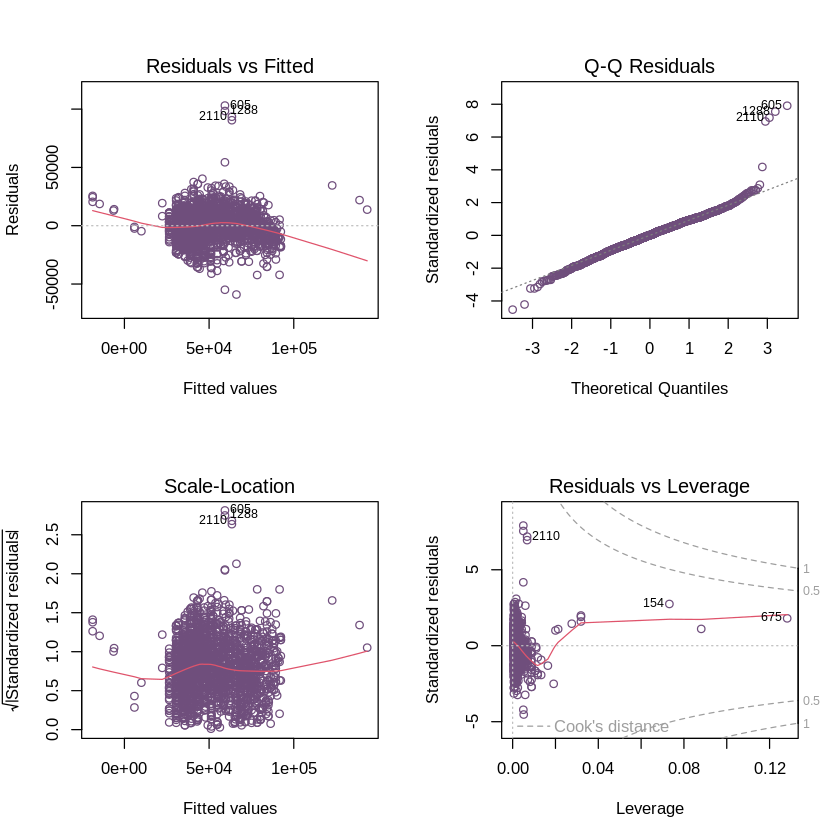

In [ ]:
#Interaction model 4
MLlm.inter2 = lm(Income~NumCatalogPurchases*NumWebVisitsMonth, data = CustomerData)
summary(MLlm.inter)

coef(MLlm.inter)
confint(MLlm.inter)

MLlm.inter=lm(Income~NumCatalogPurchases*NumWebVisitsMonth,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.inter, col = my_colors[3])

dt <- coef(summary(MLlm.inter));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")

# Save the plot as a PNG file
png("Income_vs_Catalog_Web_Interaction.png")
plot(MLlm.inter, col = my_colors[3])
dev.off()


Call:
lm(formula = Income ~ NumWebVisitsMonth * Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-63573  -9388     35   9271  94396 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 87844.7      941.6   93.29   <2e-16 ***
NumWebVisitsMonth           -7277.1      165.3  -44.01   <2e-16 ***
Teenhome                   -16476.9     1610.5  -10.23   <2e-16 ***
NumWebVisitsMonth:Teenhome   3909.9      274.6   14.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15390 on 2208 degrees of freedom
Multiple R-squared:  0.4888,	Adjusted R-squared:  0.4881 
F-statistic: 703.7 on 3 and 2208 DF,  p-value: < 2.2e-16


(Intercept)          NumWebVisitsMonth 
                 87844.690                  -7277.053 
                  Teenhome NumWebVisitsMonth:Teenhome 
                -16476.854                   3909.858

,2.5 %,97.5 %
(Intercept),85998.117,89691.262
NumWebVisitsMonth,-7601.304,-6952.802
Teenhome,-19635.069,-13318.638
NumWebVisitsMonth:Teenhome,3371.437,4448.280


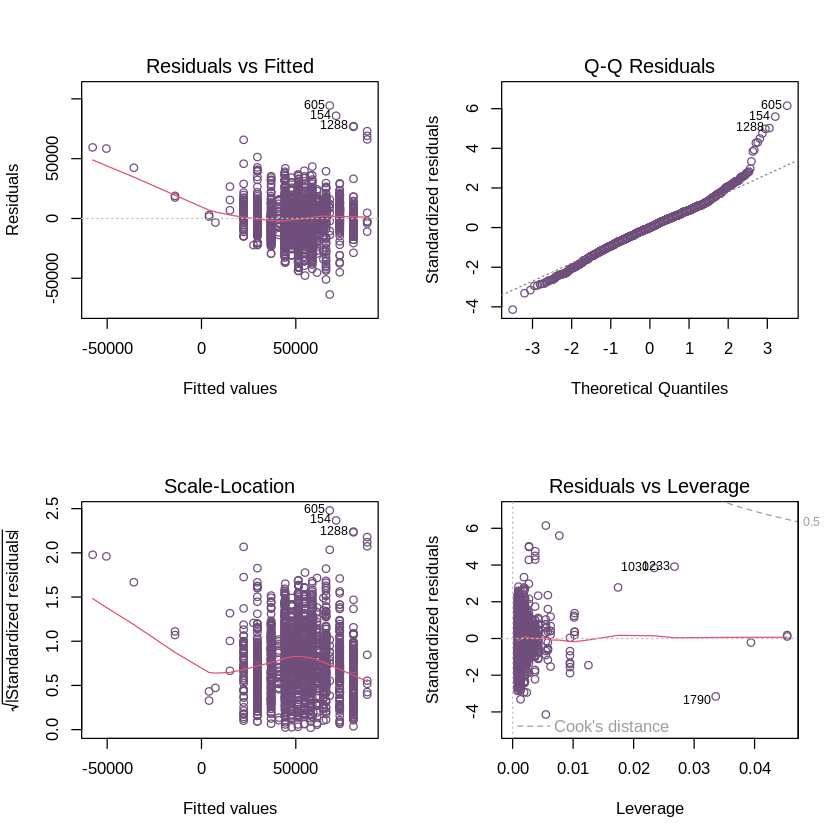

In [ ]:
#Interaction model 5
MLlm.inter3 = lm(Income~NumWebVisitsMonth*Teenhome, data = CustomerData)
summary(MLlm.inter)

coef(MLlm.inter)
confint(MLlm.inter)

MLlm.inter=lm(Income~NumWebVisitsMonth*Teenhome,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.inter, col = my_colors[3])


Call:
lm(formula = Income ~ MntMeatProducts * MntWines, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-32927  -7393   -147   6691 124638 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.304e+04  3.943e+02   83.81   <2e-16 ***
MntMeatProducts           7.907e+01  2.224e+00   35.55   <2e-16 ***
MntWines                  4.181e+01  1.211e+00   34.52   <2e-16 ***
MntMeatProducts:MntWines -7.410e-02  3.712e-03  -19.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12240 on 2208 degrees of freedom
Multiple R-squared:  0.6768,	Adjusted R-squared:  0.6764 
F-statistic:  1541 on 3 and 2208 DF,  p-value: < 2.2e-16


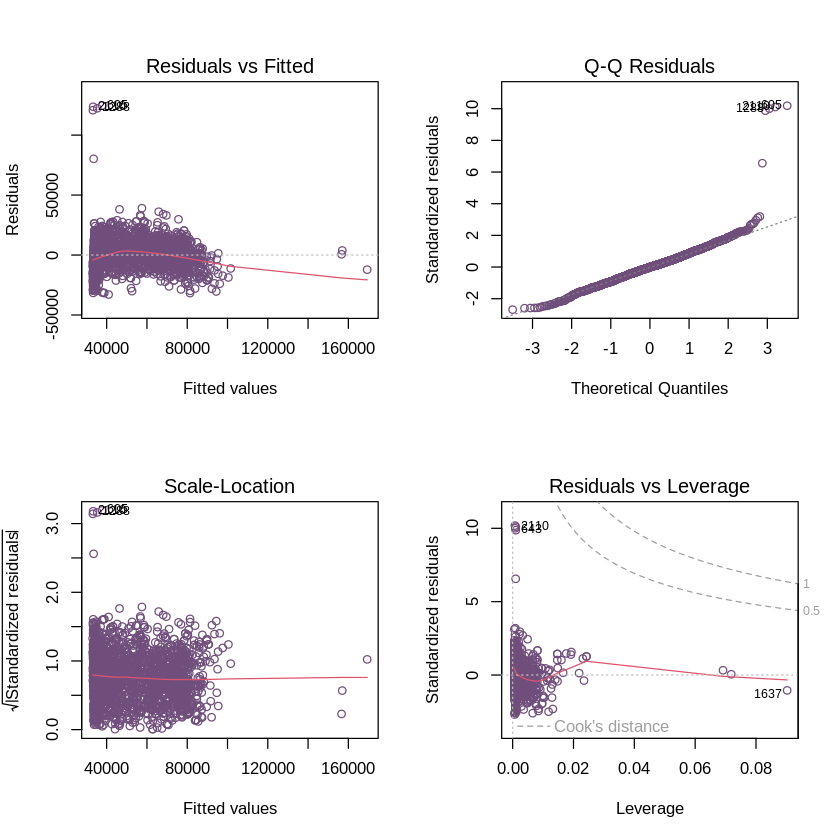

In [ ]:
MLlm.inter4 <- lm(Income~MntMeatProducts*MntWines, data=CustomerData)

summary(MLlm.inter4)

par(mfrow=c(2,2))
plot(MLlm.inter4, col = my_colors[3])


Call:
lm(formula = Income ~ MntWines * MntMeatProducts + NumCatalogPurchases + 
    NumWebVisitsMonth + Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-58444  -5918    -62   5491 108612 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.036e+04  8.065e+02  62.437   <2e-16 ***
MntWines                  3.505e+01  1.252e+00  27.995   <2e-16 ***
MntMeatProducts           5.622e+01  2.453e+00  22.920   <2e-16 ***
NumCatalogPurchases       2.224e+02  1.355e+02   1.642    0.101    
NumWebVisitsMonth        -3.090e+03  1.089e+02 -28.374   <2e-16 ***
Teenhome                  5.231e+03  4.261e+02  12.277   <2e-16 ***
MntWines:MntMeatProducts -5.554e-02  3.453e-03 -16.083   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10140 on 2205 degrees of freedom
Multiple R-squared:  0.7787,	Adjusted R-squared:  0.7781 
F-statistic:  1293 on 6 and 2205 DF, 

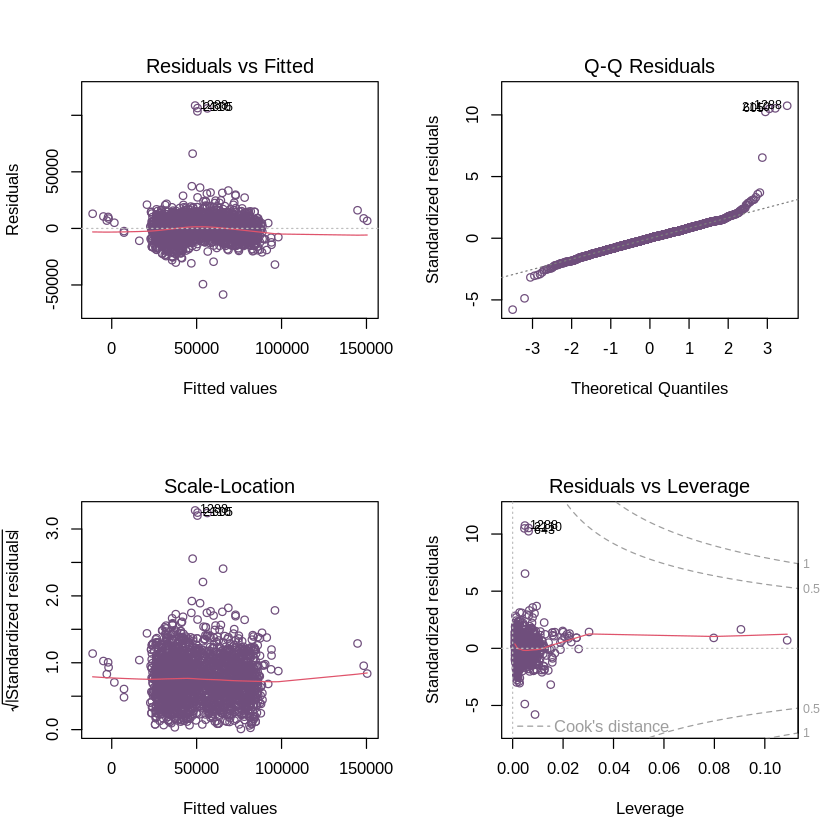

In [ ]:
MLlm.inter5 <- lm(Income~MntWines*MntMeatProducts + NumCatalogPurchases + NumWebVisitsMonth + Teenhome,  data = CustomerData)
summary(MLlm.inter5)

par(mfrow=c(2,2))
plot(MLlm.inter5, col = my_colors[3])


Call:
lm(formula = Income ~ MntWines * MntMeatProducts + NumWebVisitsMonth + 
    Teenhome, data = CustomerData)

Residuals:
   Min     1Q Median     3Q    Max 
-58631  -5789     62   5522 108287 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.066e+04  7.858e+02   64.46   <2e-16 ***
MntWines                  3.619e+01  1.044e+00   34.67   <2e-16 ***
MntMeatProducts           5.857e+01  1.997e+00   29.33   <2e-16 ***
NumWebVisitsMonth        -3.129e+03  1.062e+02  -29.46   <2e-16 ***
Teenhome                  5.204e+03  4.259e+02   12.22   <2e-16 ***
MntWines:MntMeatProducts -5.788e-02  3.145e-03  -18.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10140 on 2206 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7779 
F-statistic:  1550 on 5 and 2206 DF,  p-value: < 2.2e-16


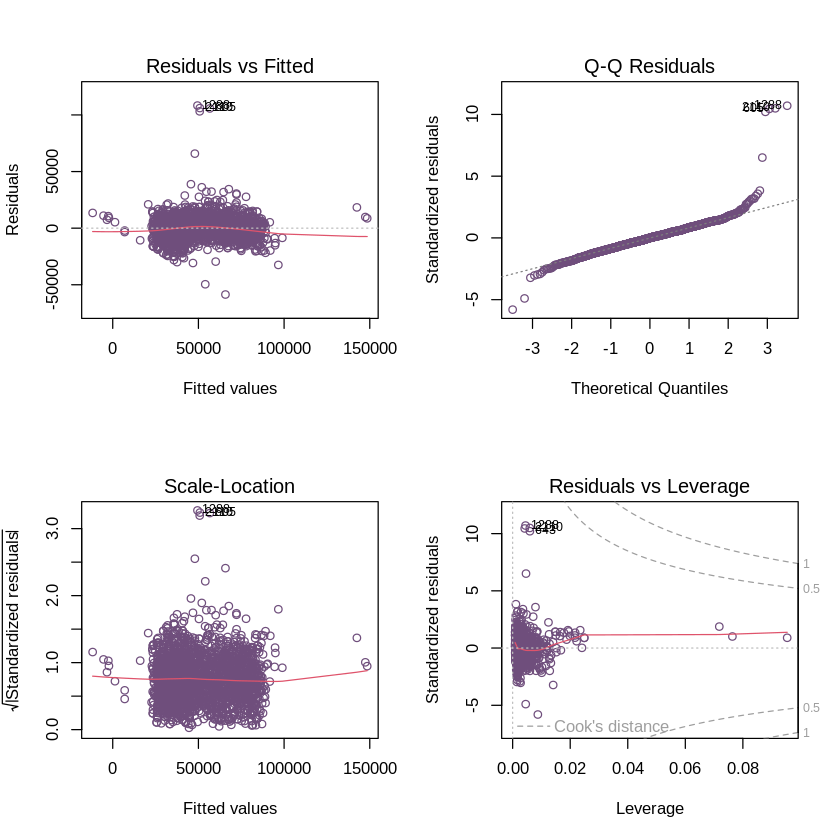

In [ ]:
MLlm.inter6 <- lm(Income~MntWines*MntMeatProducts + NumWebVisitsMonth + Teenhome,  data = CustomerData)
summary(MLlm.inter6)

par(mfrow=c(2,2))
plot(MLlm.inter6, col = my_colors[3])

In [ ]:
#anova for interaction terms
anova(MlBase, MLlm.inter1)
anova(MlBase, MLlm.inter2)
anova(MlBase, MLlm.inter3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2208,370550110594,-18,-144784467777,78.02535,6.791071e-220


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2208,376751497759,-18,-150985854942,81.36732,1.064093e-227


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2190,225765642817,NA,NA,NA,NA
2,2208,523190710387,-18,-297425067570,160.2844,0


# Step 3: Polynomial Regression Models (Step 3 is Optional with Bonus)
**Objective: Explore the data's fit to quadratic and polynomial regression models (up to a reasonable degree, e.g., 3rd or 4th).**

  * Ensure a rationale behind the polynomial degree choice to prevent overfitting.
  * Again, validate model fit using both numerical metrics and graphical plots.
  * Use ANOVA to compare polynomial models to linear models and among themselves.
  * Summarize your findings and provide interpretations.

#Step 4: Data Transformations
  * If your dataset contains variables that are highly skewed (e.g., lifetime in days, house values), consider applying transformations like log() to stabilize variance and improve model fit.
  * Validate the transformed model both numerically and graphically.
  * Use ANOVA for model comparison, drawing attention to how transformations may improve or impact the model fit.
  * Draw relevant conclusions.


Call:
lm(formula = Income_log ~ MntWines_log + MntMeatProducts_log + 
    NumCatalogPurchases_scaled + NumWebVisitsMonth_scaled + Teenhome, 
    data = CustomerData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37396 -0.10498  0.00929  0.13026  1.57787 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 9.864179   0.023194 425.289  < 2e-16 ***
MntWines_log                0.146386   0.006031  24.270  < 2e-16 ***
MntMeatProducts_log         0.038576   0.007685   5.020 5.59e-07 ***
NumCatalogPurchases_scaled  0.010075   0.008400   1.199     0.23    
NumWebVisitsMonth_scaled   -0.174721   0.006363 -27.460  < 2e-16 ***
Teenhome                    0.089903   0.011144   8.068 1.16e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2492 on 2206 degrees of freedom
Multiple R-squared:  0.7514,	Adjusted R-squared:  0.7508 
F-statistic:  1333 on 5 and 2206 DF,  p-value:

(Intercept)               MntWines_log 
                9.86417875                 0.14638577 
       MntMeatProducts_log NumCatalogPurchases_scaled 
                0.03857629                 0.01007460 
  NumWebVisitsMonth_scaled                   Teenhome 
               -0.17472133                 0.08990300

,2.5 %,97.5 %
(Intercept),9.818694273,9.90966323
MntWines_log,0.134557879,0.15821366
MntMeatProducts_log,0.023506136,0.05364644
NumCatalogPurchases_scaled,-0.006397252,0.02654645
NumWebVisitsMonth_scaled,-0.187198750,-0.16224392
Teenhome,0.068049942,0.11175606


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Estimate </th>
   <th style="text-align:right;"> Std. Error </th>
   <th style="text-align:right;"> t value </th>
   <th style="text-align:right;"> Pr(&gt;|t|) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 9.8641788 </td>
   <td style="text-align:right;"> 0.0231941 </td>
   <td style="text-align:right;"> 425.288995 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntWines_log </td>
   <td style="text-align:right;"> 0.1463858 </td>
   <td style="text-align:right;"> 0.0060314 </td>
   <td style="text-align:right;"> 24.270456 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> MntMeatProducts

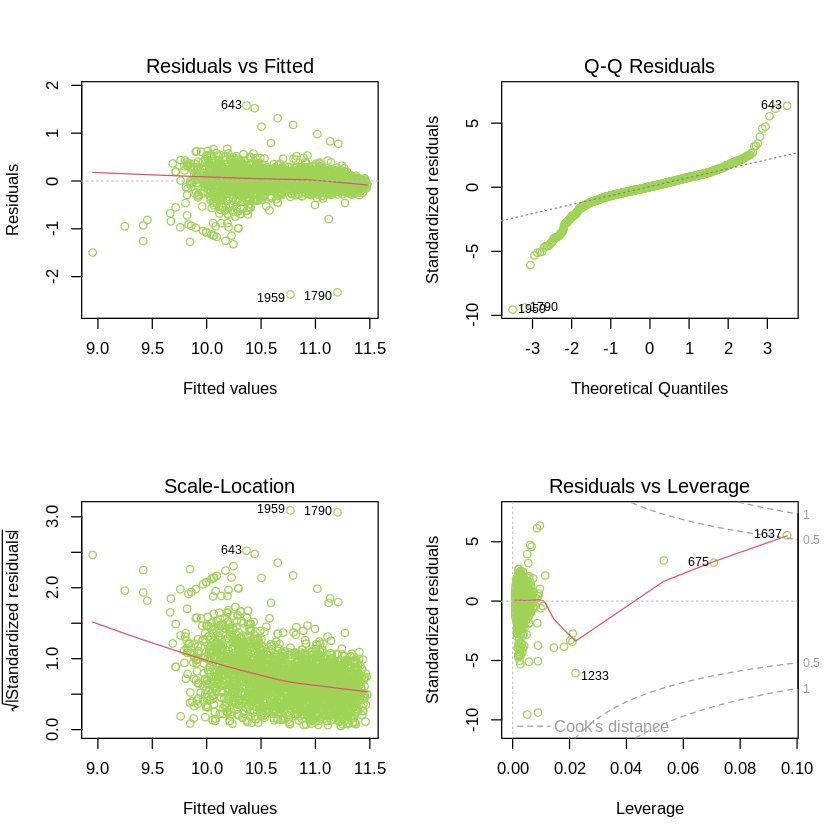

In [ ]:
MLlm.fit3_log = lm(Income_log~MntWines_log + MntMeatProducts_log + NumCatalogPurchases_scaled + NumWebVisitsMonth_scaled + Teenhome,data=CustomerData)
summary(MLlm.fit3_log)
coef(MLlm.fit3_log)
confint(MLlm.fit3_log)

MLlm.fit3_log=lm(Income_log~MntWines_log + MntMeatProducts_log + NumCatalogPurchases_scaled + NumWebVisitsMonth_scaled + Teenhome,data=CustomerData)
par(mfrow=c(2,2))
plot(MLlm.fit3_log, col = my_colors[4])

dt <- coef(summary(MLlm.fit3_log));
dt %>%
  kableExtra::kbl() %>%
  kableExtra::kable_classic(full_width = F, html_font = "Cambria")


## Scaling and transforming the data so graphical analysis has clarity, and appears visually comparable

In [ ]:
CustomerData <- CustomerData %>%
  mutate(
    Income_log  = log(Income),
    MntWines_log = log(MntWines + 1),
    MntMeatProducts_log = log(MntMeatProducts + 1),
    MntFishProducts_log = log(MntFishProducts + 1),
    MntSweetProducts_log = log(MntSweetProducts + 1),
    MntGoldProds_log = log(MntGoldProds + 1)
  )


In [ ]:
CustomerData <- CustomerData %>%
  mutate(
    NumCatalogPurchases_scaled = scale(NumCatalogPurchases),
    NumStorePurchases_scaled   = scale(NumStorePurchases),
    NumWebPurchases_scaled     = scale(NumWebPurchases),
    Recency_scaled             = scale(Recency),
    NumWebVisitsMonth_scaled = scale(NumWebVisitsMonth),
    Teenhome_scaled = scale(Teenhome)
  )

# Step 5: Visualization:
* Throughout each step, utilize a range of plots to understand variable relationships, visualize model fits, and identify patterns or anomalies.
* Visual aids enhance comprehension and offer deeper insights into the data's story

In [ ]:
library(ggplot2)

ggplot(CustomerData, aes(x = log_MntWines, y = log_Income)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Log(Income) vs Log(Wine Spending)",
       x = "Log(Wine Spending)",
       y = "Log(Income)") +
  theme_minimal()


#Step 6: Conclusion and Interpretation:
* Synthesize your findings across all required steps.
* Highlight the practical implications of the results from your best-fitting model.
* Discuss any challenges faced, model limitations, and suggest potential areas for further exploration or improvement.